In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [15]:
def build_inverted_index(documents):
    inverted_index = {}
    
    for doc_id, document in enumerate(documents):
        terms = preprocess_document(document)
        for term in terms:
            if term not in inverted_index:
                inverted_index[term] = set()
            inverted_index[term].add(doc_id)
            
    return inverted_index

In [16]:
import pandas as pd

documents_df = pd.read_csv(r'C:\Users\ftsms\Downloads\docsdata.csv', encoding='utf-8')
documents = documents_df['text'].tolist()

In [17]:
def boolean_query_simple(query, documents):
    query_terms = preprocess_document(query)
    matching_documents = []

    for doc_id, document in enumerate(documents):
        document_terms = preprocess_document(document)
        
        # Check if any of the query terms are in the document terms
        if any(term in document_terms for term in query_terms):
            matching_documents.append(doc_id)

    if not matching_documents:
        print("No documents match the query.")
    else:
        print("Matching Document IDs:")
        for doc_id in matching_documents:
            print(f"- Document ID: {doc_id}")


query = "literature"
boolean_query_simple(query, documents)


Matching Document IDs:
- Document ID: 7
- Document ID: 9
- Document ID: 10
- Document ID: 14
- Document ID: 15
- Document ID: 16
- Document ID: 17


In [18]:
def boolean_query_with_frequencies(query, documents):
    query_terms = preprocess_document(query)
    doc_freq_pairs = []

    for doc_id, document in enumerate(documents):
        document_terms = preprocess_document(document)
        term_count = sum(term in document_terms for term in query_terms)
        
        if term_count > 0:
            doc_freq_pairs.append((doc_id, term_count))

    return zip(*doc_freq_pairs)  # Separates doc IDs and frequencies


query = "literature"
doc_ids, frequencies = boolean_query_with_frequencies(query, documents)


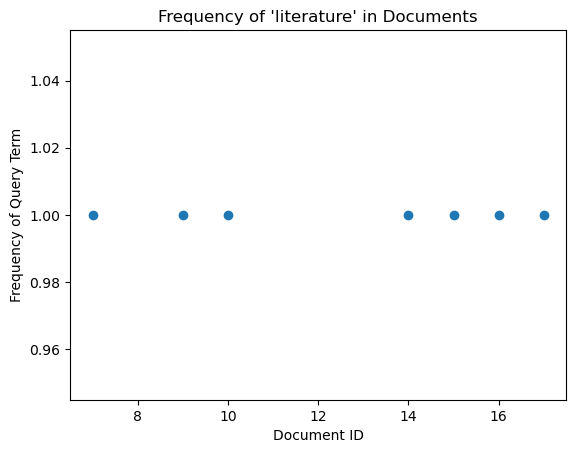

In [19]:
import matplotlib.pyplot as plt

def plot_frequencies(doc_ids, frequencies):
    plt.scatter(doc_ids, frequencies)
    plt.title(f"Frequency of '{query}' in Documents")
    plt.xlabel('Document ID')
    plt.ylabel('Frequency of Query Term')
    plt.show()

# Plotting the results
plot_frequencies(doc_ids, frequencies)
